In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [57]:
!head -5 chasewillden-netflix-shows/data/netflix.csv

In [58]:
df = pd.read_csv("./chasewillden-netflix-shows/data/netflix.csv")
df.head()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratinglevel          941 non-null object
ratingdescription    1000 non-null int64
release_year         1000 non-null int64
user_rating_score    605 non-null float64
user_rating_size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [60]:
df.describe()

,ratingdescription,release_year,user_rating_score,user_rating_size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


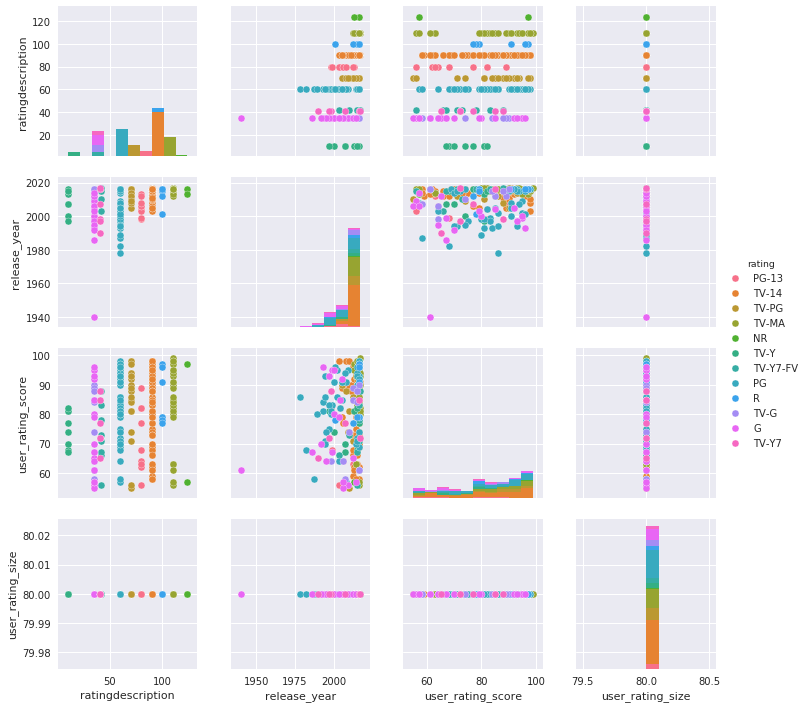

In [61]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
sns.pairplot(df, hue='rating')

In [62]:
df_by_year = df.groupby("release_year")

In [63]:
type(df_by_year)

pandas.core.groupby.DataFrameGroupBy

In [64]:
df_by_year.describe().head()

ratingdescription                                          \
                         count  mean std   min   25%   50%   75%   max   
release_year                                                             
1940                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1978                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1982                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1986                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1987                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   

             user_rating_score        ...              user_rating_size        \
                         count  mean  ...    75%   max            count  mean   
release_year                          ...                                       
1940                       1.0  61.0  ...   61.0  61.0              1.0  80.0   
1978                       1.0  86.0  ...   86.0  86.0              1.0  80.0   
1982                       1.0  68.0  ...   68.0  68.0              1.0  80.0   
1986                       1.0  67.0  ...   67.0  67.0              1.0  80.0   
1987                       1.0  58.0  ...   58.0  58.0              1.0  80.0   

                                                
             std   min   25%   50%   75%   max  
release_year                                    
1940         NaN  80.0  80.0  80.0  80.0  80.0  
1978         NaN  80.0  80.0  80.0  80.0  80.0  
1982         NaN  80.0  80.0  80.0  80.0  80.0  
1986         NaN  80.0  80.0  80.0  80.0  80.0  
1987         NaN  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

In [65]:
list(df_by_year)[2]

(1982,      title rating                     ratinglevel  ratingdescription  \
 658  Annie     PG  adult content and mld violence                 60   
 
      release_year  user_rating_score  user_rating_size  
 658          1982               68.0                80  )

In [66]:
df_med_by_year = df_by_year.median()
df_med_by_year.tail()

,ratingdescription,user_rating_score,user_rating_size
release_year,,,
2013,90.0,81.0,80.0
2014,80.0,74.0,80.0
2015,80.0,83.5,80.0
2016,90.0,90.0,80.0
2017,110.0,89.0,80.0


In [67]:
df_by_year.quantile(0.8).tail()

0.8,ratingdescription,user_rating_score,user_rating_size
release_year,,,
2013,110.0,92.0,80.0
2014,90.0,90.6,80.0
2015,90.0,94.0,80.0
2016,110.0,96.0,80.0
2017,110.0,93.2,80.0


In [68]:
print(df.index)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            908, 911, 917, 931, 962, 966, 967, 972, 973, 979],
           dtype='int64', length=246)


In [69]:
print(df_med_by_year.index)

Int64Index([1940, 1978, 1982, 1986, 1987, 1989, 1990, 1992, 1993, 1994, 1995,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='release_year')


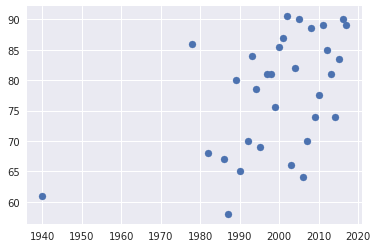

In [70]:
df_rat_by_year = df_med_by_year.user_rating_score
plt.scatter(df_rat_by_year.index, df_rat_by_year)

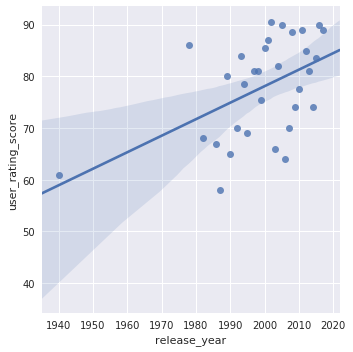

In [71]:
sns.lmplot(x="release_year",
           y="user_rating_score",
           data=df_rat_by_year.reset_index())
